# <center>Fraud detection project

---

## I- Data importation and preparation

In [1]:
# Package to import 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import metrics
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.svm import SVC
import pickle
from os import path
# !pip install google

For the code to work properly you need to install version 1.0.2 of Scikit-Learn. To do this, open your prompt, create a virtual environment and install the packages with the command:
```
pip install -r requirements.txt
```

In [2]:
# Global variables

RANDOM_STATE = 55
MODEL_PATH = "./Models/"
MODEL_EXTENSION = ".sav"
N_SPLITS = 5

### A- Data importation

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv", sep=',')
except: 
    data = pd.read_csv("./Data/creditcard.csv", sep=',')
    
data.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,False
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,False
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,False
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,False
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,False


In [4]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,...,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000


*********

### B- Data exploration

In [5]:
print(f"Column names: {list(data.columns)}")

Column names: ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']


In [6]:
print(f"Data's shape: {data.shape}\n------")
print(f"Data's dtypes:\n{data.dtypes}")

Data's shape: (284807, 31)
------
Data's dtypes:
time        int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
amount    float64
class        bool
dtype: object


In [7]:
data.isna().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

There isn't any null observation or missing information in the dataset <br>

*********

Let's take a look at the *time* variable

In [8]:
len(data['time'].unique())

124592

*********************

### C- Data preparation

The *time* variable seems to not give any informations, so we chose to delete. We must delete it because it's a counter and it will be the most important variable.

In [9]:
data.drop(columns='time', inplace=True)

Separating inputs (X) & output (Y).

In [10]:
# On peut combiner la ligne 6 ans la 7 
X = data.drop(columns="class")
print(X.shape)
X.head(5)

(284807, 29)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
Y = data['class'].copy()
print(Y.shape)
Y.head(5)

(284807,)


0    False
1    False
2    False
3    False
4    False
Name: class, dtype: bool

In [12]:
X_normalized = StandardScaler().fit_transform(X)
# Become a ndarray it's not a DataFrame anymore
Y_prepross = LabelBinarizer().fit_transform(Y)

Y_prepross = Y_prepross.reshape((Y_prepross.shape[0]))

In [13]:
x_train, x_test,y_train, y_test = train_test_split(X_normalized, Y_prepross,\
                                                   test_size=0.3, random_state=RANDOM_STATE,\
                                                   stratify=Y_prepross)
# Stratify attribute permites us to have the same amount of fraud in our 
# subdatasets! It's a way to fight against bais du to imbalanced data

In [14]:
print(f"x_train shape:{x_train.shape}\nx_test shape:{x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape:(199364, 29)
x_test shape:(85443, 29)
y_train shape: (199364,)
y_test shape: (85443,)


Compute fraud rate in the dataset

In [15]:
fraud_rate = (y_train.sum() + y_test.sum()) / (y_train.shape[0] + y_test.shape[0])
# We can also use: 
# fraud_rate = data['class'].sum() / data.shape[0]
print(f"Fraud rate: {round(fraud_rate * 100, 4)}%")

Fraud rate: 0.1727%


In [16]:
def addlabels(x, y):
    """
    Add the corresponding value for each segment of a barplot
    """
    for i in range(len(x)):
        plt.text(i, y[i]+1, round(y[i], 3), ha='center')

In [17]:
def plotDistribution(result_dict: dict, title: str, x_label: str, absolute=True) -> None:
    """
    Display a barplot with absolute value or relative value
    """
    fig = plt.figure(figsize=(8,6))
    if absolute:
        plt.bar(result_dict.keys(), result_dict.values(), color= ['red', 'blue', 'cyan', 'orange', 'green', 'yellow'])
        plt.title(label=title)
        plt.xlabel(x_label)
        addlabels(result_dict.keys(), list(result_dict.values()))
    else:
        ratio = [(i/sum(result_dict.values()))*100 for i in list(result_dict.values())]

        plt.bar(result_dict.keys(), ratio, color= ['red', 'blue', 'cyan', 'orange', 'green', 'yellow'])
        plt.title(label=title)
        plt.xlabel(x_label)
        plt.ylabel('en %')
        addlabels(result_dict.keys(), ratio)
    fig.tight_layout()
    plt.show()

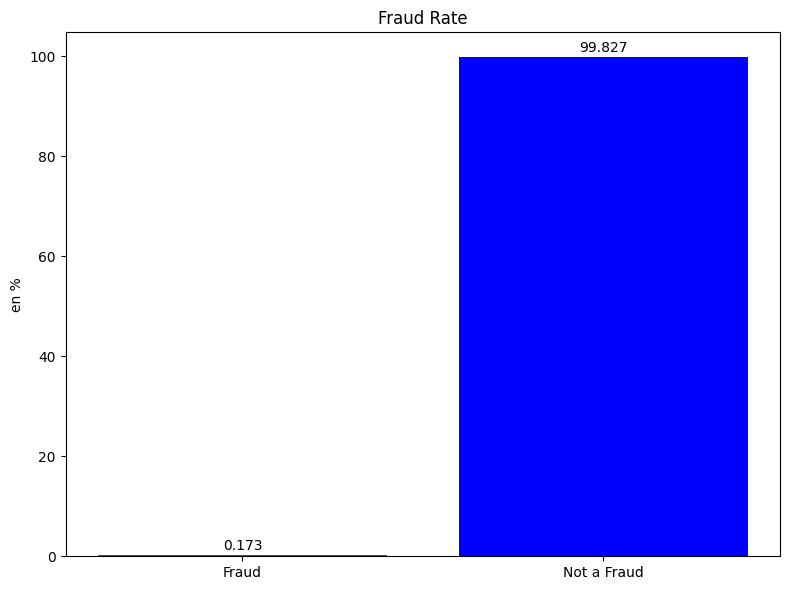

In [18]:
fraud_rate_dict = {"Fraud": data["class"].sum(), "Not a Fraud": (data['class'] == False).sum()}

plotDistribution(fraud_rate_dict, "Fraud Rate", "", absolute=False)

In [19]:
# Check if we don't miss any observation
((data['class'] == False).sum() + data['class'].sum()) == data.shape[0]

True

In [20]:
print(f"y_train fraud rate: {round((y_train.sum()/y_train.shape[0])*100, 4)}%\n")
print(f"y_test fraud rate: {round((y_test.sum()/y_test.shape[0])*100, 4)}%")

y_train fraud rate: 0.1725%

y_test fraud rate: 0.1732%


In [21]:
#TODO: dimensions reduction!

__Few words before training and testing algorithms__ <br>
Warning can appears during finding the best hyperparameters for each algorithm this is normal because some hyperparameters doesn't work together! But there isn't any influence on the algortihm efficiency.

We'll use Cross Validation for all classifier.

In [22]:
stratified_k_fold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

In [23]:
def saveModel(model, model_name: str):
    filename = path.join(MODEL_PATH, model_name + MODEL_EXTENSION)
    pickle.dump(model, open(filename, "wb"))

In [24]:
def loadModel(model_name: str):
    filename = path.join(MODEL_PATH, model_name + MODEL_EXTENSION)
    loaded_model = pickle.load(open(filename, "rb"))
    
    return loaded_model

**************

## II- Logistic Regression Classifier

In [25]:
lr = LogisticRegression()

In the next cell we're choosing the best hyperparameters for the Logistic Regression, training the model wiht those hyperparameters and testing the model on the test set. We also compute the recall score on predictions done on the test set.

__All training part took a lot of time to run. So I decided to let the code as markdown and not a code cell so we can run it quickly. Trained model are saved on a folder give with this notebook.__

Let's use GridSearchCV for testing different hyperparameters for LR

---
```python
start_time = datetime.now()

lr_parameters = {"penalty": ["none", "l2", "l1", "elasticnet"],
                 "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                 "C": [0.1, 1, 10],
                "max_iter": [100, 1000, 10000, 100000]}

lr_hpc = GridSearchCV(estimator=lr, 
                   param_grid=lr_parameters,
                   scoring="recall",
                   verbose=1, 
                   cv=stratified_k_fold,
                  n_jobs=-1)

lr_model = lr_hpc.fit(x_train, y_train)
y_pred_lr_bp = lr_model.predict(x_test)


print("\nBest parameters:", lr_hpc.best_params_)
print("Best recall score:", round(lr_hpc.best_score_, 4))
print(len("Recall score on test set:")*"*")
lr_recall = metrics.recall_score(y_test, y_pred_lr_bp)
print("\nRecall score on test set:", round(lr_recall, 4))

matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr_bp)
sns.heatmap(matrix_lr, annot = True, fmt='g', cmap="Blues")
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
```
---

Next cell: find the best hyperparameters, train a model with those hyperparameters, make predict on the test set, save the best model on *Models* folder and display the confusion matrix.

This cell is use to train the model ! It takes a lot of time, for prediction only check cells below.
```python
start_time = datetime.now()

lr_parameters = {"solver": ["newton-cg", "liblinear"],
                 "max_iter": [100, 1000, 10000, 100000]}

lr_hpc = GridSearchCV(estimator=lr, 
                   param_grid=lr_parameters,
                   scoring="recall",
                   verbose=1, 
                   cv=stratified_k_fold,
                  n_jobs=-1)

lr_model = lr_hpc.fit(x_train, y_train)
y_pred_lr_bp = lr_model.predict(x_test)

saveModel(lr_model, "lr_model")

print("Best parameters:", lr_hpc.best_params_)
print("Best recall score:", round(lr_hpc.best_score_, 4))
print(len("Recall score on test set:")*"*")
print("\nRecall score on test set:", round(metrics.recall_score(y_test, y_pred_lr_bp), 4))

matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr_bp)
sns.heatmap(matrix_lr, annot = True, fmt='g', cmap="Blues")
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
```

Load the last saved model, make prediction on the test set and display the confusion matrix.

Best hyperparameters: {'max_iter': 100, 'solver': 'newton-cg'}

Recall score on test set: 0.5946


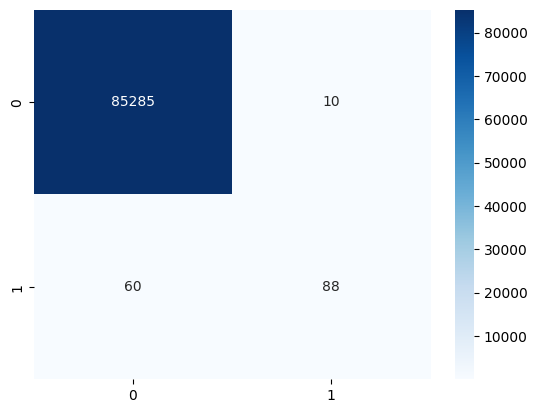

In [54]:
lr_model = loadModel("lr_model")
print(f"Best hyperparameters: {lr_model.best_params_}")

y_pred_lr = lr_model.predict(x_test)

lr_test_score = metrics.recall_score(y_test, y_pred_lr)

print("\nRecall score on test set:", round(lr_test_score, 4))

matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr, annot = True, fmt='g', cmap="Blues")
plt.show()

*****

## III- Decision Tree Classifier

In [28]:
dt = DecisionTreeClassifier()

Code for training:

---
```python
start_time = datetime.now()

dt_parameters = {"criterion": ["gini", "entropy", "log_loss"],
                "splitter": ["best", "random"]}

dt_hpc = GridSearchCV(estimator=dt, 
                   param_grid=dt_parameters,
                   scoring="recall",
                   verbose=1, 
                   cv=stratified_k_fold,
                  n_jobs=-1)

dt_model = dt_hpc.fit(x_train, y_train)
y_pred_dt_bp = dt_model.predict(x_test)

saveModel(dt_model, "dt_model")

print("Best parameters:", dt_hpc.best_params_)
print("Best recall score:", round(dt_hpc.best_score_, 4))
print(len("Recall score on test set:")*"*")
dt_recall = metrics.recall_score(y_test, y_pred_dt_bp)
print("\nRecall score on test set:", round(dt_recall, 4))

matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt_bp)
sns.heatmap(matrix_dt, annot = True, fmt='g', cmap="Blues")
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
```
---

Best hyperparameters: {'criterion': 'entropy', 'splitter': 'random'}

Recall score on test set: 0.7432


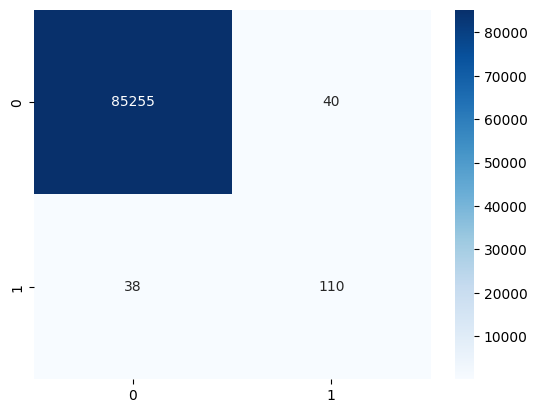

In [53]:
dt_model = loadModel("dt_model")
print(f"Best hyperparameters: {dt_model.best_params_}")

y_pred_dt = dt_model.predict(x_test)
dt_test_score = metrics.recall_score(y_test, y_pred_dt)

print("\nRecall score on test set:", round(dt_test_score, 4))

matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix_dt, annot = True, fmt='g', cmap="Blues")
plt.show()

*************

## IV- Random Forest Classifier

In [30]:
rf = RandomForestClassifier()

---
```python
start_time = datetime.now()

rf_parameters = {"criterion": ["gini", "entropy", "log_loss"]}

rf_hpc = GridSearchCV(estimator=rf, 
                   param_grid=rf_parameters,
                   scoring="recall",
                   verbose=1, 
                   cv=stratified_k_fold,
                  n_jobs=-1)

rf_model = rf_hpc.fit(x_train, y_train)
y_pred_rf_bp = rf_model.predict(x_test)

saveModel(rf_model, "rf_model")

print("Best parameters:", rf_hpc.best_params_)
print("Best recall score:", round(rf_hpc.best_score_, 4))
print(len("Recall score on test set:")*"*")
rf_recall = metrics.recall_score(y_test, y_pred_rf_bp)
print("\nRecall score on test set:", round(rf_recall, 4))

matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf_bp)
sns.heatmap(matrix_rf, annot = True, fmt='g', cmap="Blues")
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
```
---

Best hyperparameters: {'criterion': 'gini'}

Recall score on test set: 0.7365


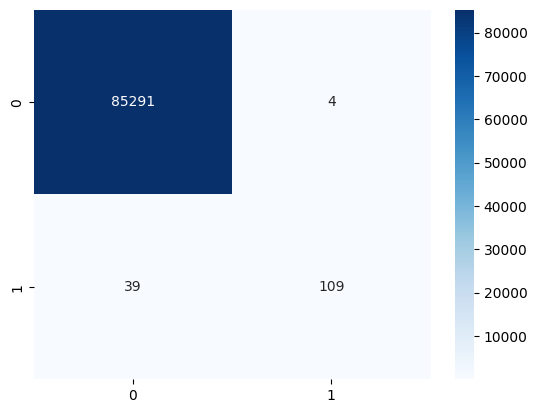

In [60]:
rf_model = loadModel("rf_model")
print(f"Best hyperparameters: {rf_model.best_params_}")

y_pred_rf = rf_model.predict(x_test)

rf_test_score = metrics.recall_score(y_test, y_pred_rf)
print("\nRecall score on test set:", round(rf_test_score, 4))

matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix_rf, annot = True, fmt='g', cmap="Blues")
plt.show()

*************

## V- SVC

In [32]:
svc = SVC(cache_size=4000)

SVC classifier doesn't stop running! There's too much data for the training set! 

__SVCs do not work on such large amounts of data. We still leave the code to train the model but we have not trained it. So CVS results will not be found in the rest of this work.__

---
```python
start_time = datetime.now()

svc_parameters = {"kernel": ["linear"]}

svc_hpc = GridSearchCV(estimator=svc, 
                   param_grid=svc_parameters,
                   scoring="recall",
                   verbose=1, 
                   cv=stratified_k_fold,
                      n_jobs=-1)

svc_model = svc_hpc.fit(x_train, y_train)
y_pred_svc_bp = svc_model.predict(x_test)

print("Best parameters:", svc_hpc.best_params_)
print("Best recall score:", round(svc_hpc.best_score_, 4))
print(len("Recall score on test set:")*"*")
svc_recall = metrics.recall_score(y_test, y_pred_svc_bp)
print("\nRecall score on test set:", round(svc_recall, 4))

matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc_bp)
sns.heatmap(matrix_svc, annot = True, fmt='g', cmap="Blues")
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
```
---

Not using *precomputed* kernel because it need a (n_sample, n_sample) matrix as input and not the usual (n_samples, n_features) matrix.

## VI- Conclusion and results

In [45]:
train_recall_score_global = {"Logistic Regression": lr_model.best_score_, "Decision Tree": dt_model.best_score_, "Random Forest": rf_model.best_score_}
# test_recall_score_global = {"Logistic Regression": lr_recall, "Decision Tree": dt_recall, "Random Forest": rf_recall, "SVC": svc_recall}

In [36]:
pprint(train_recall_score_global)

{'Decision Tree': 0.7644501278772379,
 'Logistic Regression': 0.6364023870417732,
 'Random Forest': 0.7935635123614663}


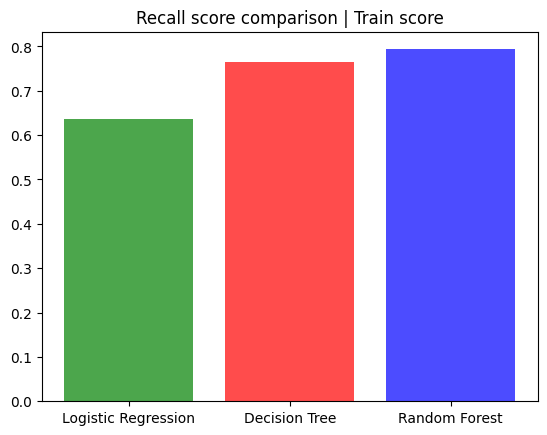

In [51]:
plt.bar(train_recall_score_global.keys(), train_recall_score_global.values(), color=["g", "r", "b"], alpha=0.7)
plt.title(label="Recall score comparison | Train score")
plt.show()

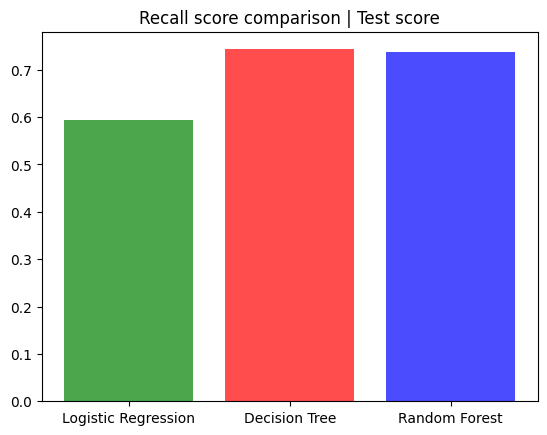

In [65]:
plt.bar("Logistic Regression", lr_test_score, color="g", alpha=0.7)
plt.bar("Decision Tree", dt_test_score, color="r", alpha=0.7)
plt.bar("Random Forest", rf_test_score, color="b", alpha=0.7)
plt.title("Recall score comparison | Test score")
plt.show()

---

__The best models are the decision tree and random forest with recall scores of up to 70%. This means that our models are able to detect 70% of frauds.__